In [4]:
#pre shit
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier



import pandas as pd

df = pd.read_csv("data_features/sg_features_v1.csv")
df.head()


df.shape
df.columns
df.isna().sum().sort_values(ascending=False).head(10)



TARGET = "final_grid_pos"

X = df.drop(columns=[TARGET])
y = df[TARGET]

X.head(), y.head()




train_df = df[df["year"] <= 2021]
test_df  = df[df["year"] >= 2022]

X_train = train_df.drop(columns=[TARGET])
y_train = train_df[TARGET]

X_test  = test_df.drop(columns=[TARGET])
y_test  = test_df[TARGET]

len(X_train), len(X_test)



(40, 60)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

learner_steps = [10, 30, 50, 100, 200, 300]

def fit_predict_mae(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return mean_absolute_error(y_test, pred)

rows = []

for n in learner_steps:
    # XGBoost
    xgb = XGBRegressor(
        random_state=42,
        n_estimators=n,
        learning_rate=0.1,
        max_depth=4
    )
    rows.append({"Model": "XGBoost", "Learners": n, "MAE": fit_predict_mae(xgb, X_train, y_train, X_test, y_test)})

    # LightGBM
    lgb = LGBMRegressor(
        random_state=42,
        n_estimators=n,
        learning_rate=0.1
    )
    rows.append({"Model": "LightGBM", "Learners": n, "MAE": fit_predict_mae(lgb, X_train, y_train, X_test, y_test)})

    # CatBoost
    cat = CatBoostRegressor(
        random_seed=42,
        iterations=n,
        learning_rate=0.1,
        depth=6,
        verbose=False,
        allow_writing_files=False
    )
    rows.append({"Model": "CatBoost", "Learners": n, "MAE": fit_predict_mae(cat, X_train, y_train, X_test, y_test)})

curve_df = pd.DataFrame(rows)
curve_df


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5
[LightGBM] [Info] Number of data points in the train set: 40, number of used features: 2
[LightGBM] [Info] Start training from score 10.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there 

,Model,Learners,MAE
0,XGBoost,10,4.511775
1,LightGBM,10,5.000000
2,CatBoost,10,4.776458
3,XGBoost,30,5.126490
4,LightGBM,30,5.000000
5,CatBoost,30,4.667036
6,XGBoost,50,5.389607
7,LightGBM,50,5.000000
8,CatBoost,50,4.751806
9,XGBoost,100,5.457146


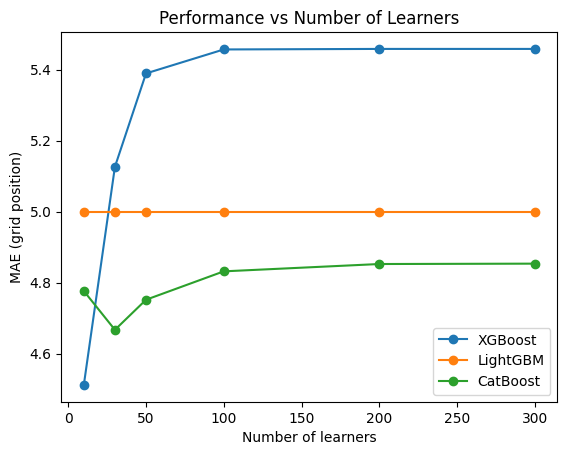

In [3]:
import matplotlib.pyplot as plt

plt.figure()

for model_name in curve_df["Model"].unique():
    sub = curve_df[curve_df["Model"] == model_name]
    sub = sub.sort_values("Learners")
    plt.plot(sub["Learners"], sub["MAE"], marker="o", label=model_name)

plt.xlabel("Number of learners")
plt.ylabel("MAE (grid position)")
plt.title("Performance vs Number of Learners")
plt.legend()
plt.show()
